In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
train = pd.read_csv('train.csv')
print(train.columns)
print(max(train['Id']))
N = max(train['Id'])+1

Index(['Id', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'], dtype='object')
9999


In [11]:
train[train['Id']==0]

,Id,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0,738.023171,1764.052346,400.157208,978.737984,2240.893199,1867.55799,-977.27788,950.088418,-151.357208,-103.218852,410.598502


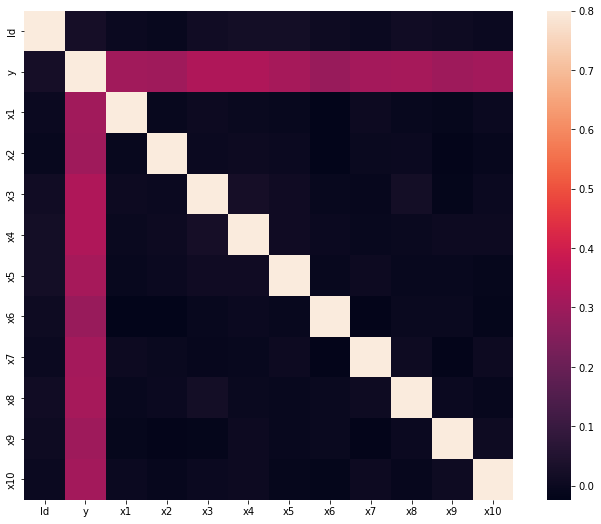

In [4]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

This shows that the dimensions of input are not related. We treat them as independent. First, we assume that it is a linear model.

In [32]:
from sklearn.linear_model import LinearRegression
X = train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']].to_numpy()
y = train['y'].to_numpy()
reg = LinearRegression().fit(X, y)
print(reg.coef_)

# train validation
y_hat_train = X@reg.coef_.T
L_train = 1/N*np.sqrt(np.sum((y_hat_train-y)**2))
print(L_train)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
1.2060373579439934e-14


Indeed, it is a linear model. Problem solved! Now we do k-fold validation.

8.9267479086325e-15
[1.3433967581923732e-14, 7.723538904340543e-15, 9.743316129503113e-15, 7.916113343730164e-15, 6.51970165399696e-15, 1.2725859820107188e-14, 7.626837402103153e-15, 8.225248504835642e-15, 7.928115812941545e-15, 7.424779932842948e-15]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


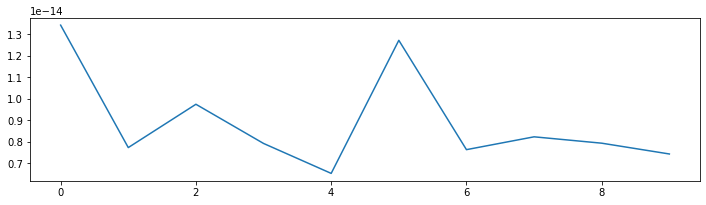

In [42]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
coe = reg.coef_.T*0
L_buf = []
for train_index, val_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", val_index)
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    reg = LinearRegression().fit(X_train, y_train)
    L_val = 1/len(y_val)*np.sqrt(np.sum((X_val@reg.coef_.T-y_val)**2))
    L_buf.append(L_val)
    coe += reg.coef_.T
    
coe = coe/10
L_ave = sum(L_buf)/10
print(L_ave)
print(L_buf)
print(coe)
f, ax = plt.subplots(figsize=(12,3))
ax.plot(range(10),L_buf)

In [43]:
# test inference
test = pd.read_csv('test.csv')
X_test = test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']]
y_hat_test = X_test@reg.coef_.T
print(y_hat_test)

0       -66.002423
1       451.406504
2      -461.676417
3        40.501209
4      -126.744722
           ...    
1995    464.715255
1996    496.485334
1997    -35.135409
1998   -131.679185
1999    417.269155
Length: 2000, dtype: float64


In [52]:
df_out = pd.DataFrame({'Id': range(N,N+len(y_hat_test)), 'y': y_hat_test})
df_out.to_csv('submit.csv', index=False) 
